<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [8]:
data = pd.read_csv(r'C:\Users\grish\OneDrive\Рабочий стол\skillfactory\pandas\data\dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [ ]:
data.head()

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [ ]:
data.info()

4. Обратите внимание на информацию о числе непустых значений.

In [ ]:
data.count()

5. Выведите основную статистическую информацию о столбцах.


In [ ]:
data.describe()

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [9]:
def level_of_education(str):
    level = ' '.join(str.split(' ')[:3])
    if 'Высшее' in level:
        return "Высшее"
    elif 'Неоконченное высшее' in level:
        return 'Неоконченное высшее'
    elif 'Среднее специальное' in level:
        return 'Среднее специальное'
    elif 'Среднее образование' in level:
        return 'Среднее'
    
    
data['Уровень образования'] = data['Образование и ВУЗ'].apply(level_of_education)
data = data.drop('Образование и ВУЗ', axis=1)
data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Уровень образования
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [10]:
def get_gender(str):
    str = ' '.join(str.split(' ')[:1])
    if 'Женщина' in str:
        return 'Ж'
    elif 'Мужчина' in str:
        return 'M'
    
def get_age(str):
    str = ' '.join(str.split(' ')[2:4])
    return int(str)

data['Пол'] = data['Пол, возраст'].apply(get_gender)
data['Возраст'] = data['Пол, возраст'].apply(get_age)
data = data.drop('Пол, возраст', axis=1)
data.head()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Уровень образования,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,M,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,M,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,M,38
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [11]:
def get_experience(exp):
    if exp is np.nan or exp == 'Не указано':
        return np.nan
    year_words=['год', 'лет', 'года']
    month_words=['месяц', 'месяцев', 'месяца']
    exp_list = exp.split(' ')[2:6]
    years = 0
    months = 0
    for index, item in enumerate(exp_list):
        if item in year_words:
            years = int(exp_list[index-1])
        if item in month_words:
            months = int(exp_list[index-1])
    return int(years*12 + months)

data['Опыт работы (месяц)'] = data['Опыт работы'].apply(get_experience)
data = data.drop('Опыт работы', axis=1)
data.head()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [12]:
def get_city(str):
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    city = str.split(',')[0].strip()
    if city == 'Москва':
        return 'Москва'
    elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

def get_move(str):
    moving = str.split(',')[1].strip()
    if 'не' in moving:
        return False
    else:
        return True
    
def get_trip(str):
    trip = str.split(',')[2].strip()
    if 'не' in trip:
        return False
    else:
        return True

data['Город'] = data['Город, переезд, командировки'].apply(get_city)
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(get_move)
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(get_trip)
 
data = data.drop('Город, переезд, командировки', axis=1)

data.head()

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Уровень образования,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,M,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,M,60,233.0,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,M,38,225.0,другие,False,True
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26,67.0,Москва,False,True


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [13]:
data['полная занятость'] = data['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
data['частичная занятость'] = data['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
data['проектная работа'] = data['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
data['cтажировка'] = data['Занятость'].apply(lambda x: True if 'стажировка' in x else False)
data['волонтерство'] = data['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)

data['гибкий график'] = data['График'].apply(lambda x: True if 'гибкий график' in x else False)
data['полный день'] = data['График'].apply(lambda x: True if 'полный день' in x else False)
data['сменный график'] = data['График'].apply(lambda x: True if 'сменный график' in x else False)
data['вахтовый метод'] = data['График'].apply(lambda x: True if 'вахтовый метод' in x else False)
data['удалённая работа'] = data['График'].apply(lambda x: True if 'удалённая рабрта' in x else False)

data = data.drop('График', axis=1)
data = data.drop('Занятость', axis=1)

data.head()

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Уровень образования,Пол,Возраст,Опыт работы (месяц),...,полная занятость,частичная занятость,проектная работа,cтажировка,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удалённая работа
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,M,39,202.0,...,True,True,True,False,False,True,True,True,True,False
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,M,60,233.0,...,True,True,True,False,False,True,True,True,False,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,...,True,False,False,False,False,False,True,False,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,M,38,225.0,...,True,True,True,False,False,True,False,False,False,False
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26,67.0,...,True,False,False,False,False,False,True,False,False,False


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [14]:
currency_df = pd.read_csv(r'C:\Users\grish\OneDrive\Рабочий стол\skillfactory\pandas\data\ExchangeRates.csv', sep=',')
currency_df['exchange_rates'] = currency_df['close'] / currency_df['proportion']
currency_df.drop(['per', 'vol', 'time', 'close', 'proportion'], axis=1, inplace=True)
currency_df['date'] = pd.to_datetime(currency_df['date'], dayfirst=True).dt.date
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date

def currency_mode(currency):
  currency = currency.split()[-1].replace('.', '')
  if currency == 'белруб':
    return 'BYN'
  if currency == 'грн':
    return 'UAH'
  if currency == 'сум':
    return 'UZS'
  if currency == 'руб':
    return 'RUB'
  else:
    return currency

data['ЗП'] = data['ЗП'].astype(str)
data['Валюта'] = data['ЗП'].apply(currency_mode)
data['ЗП'] = data['ЗП'].apply(lambda x: x.split()[0]).astype(float)

data = data.merge(currency_df, how='left', left_on=['Валюта', 'Обновление резюме'], right_on=['currency','date'])
data['exchange_rates'] = data['exchange_rates'].fillna(1.0)
data['ЗП (руб)'] = data['ЗП'] * data['exchange_rates']

data.drop(['ЗП'], axis=1, inplace=True)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

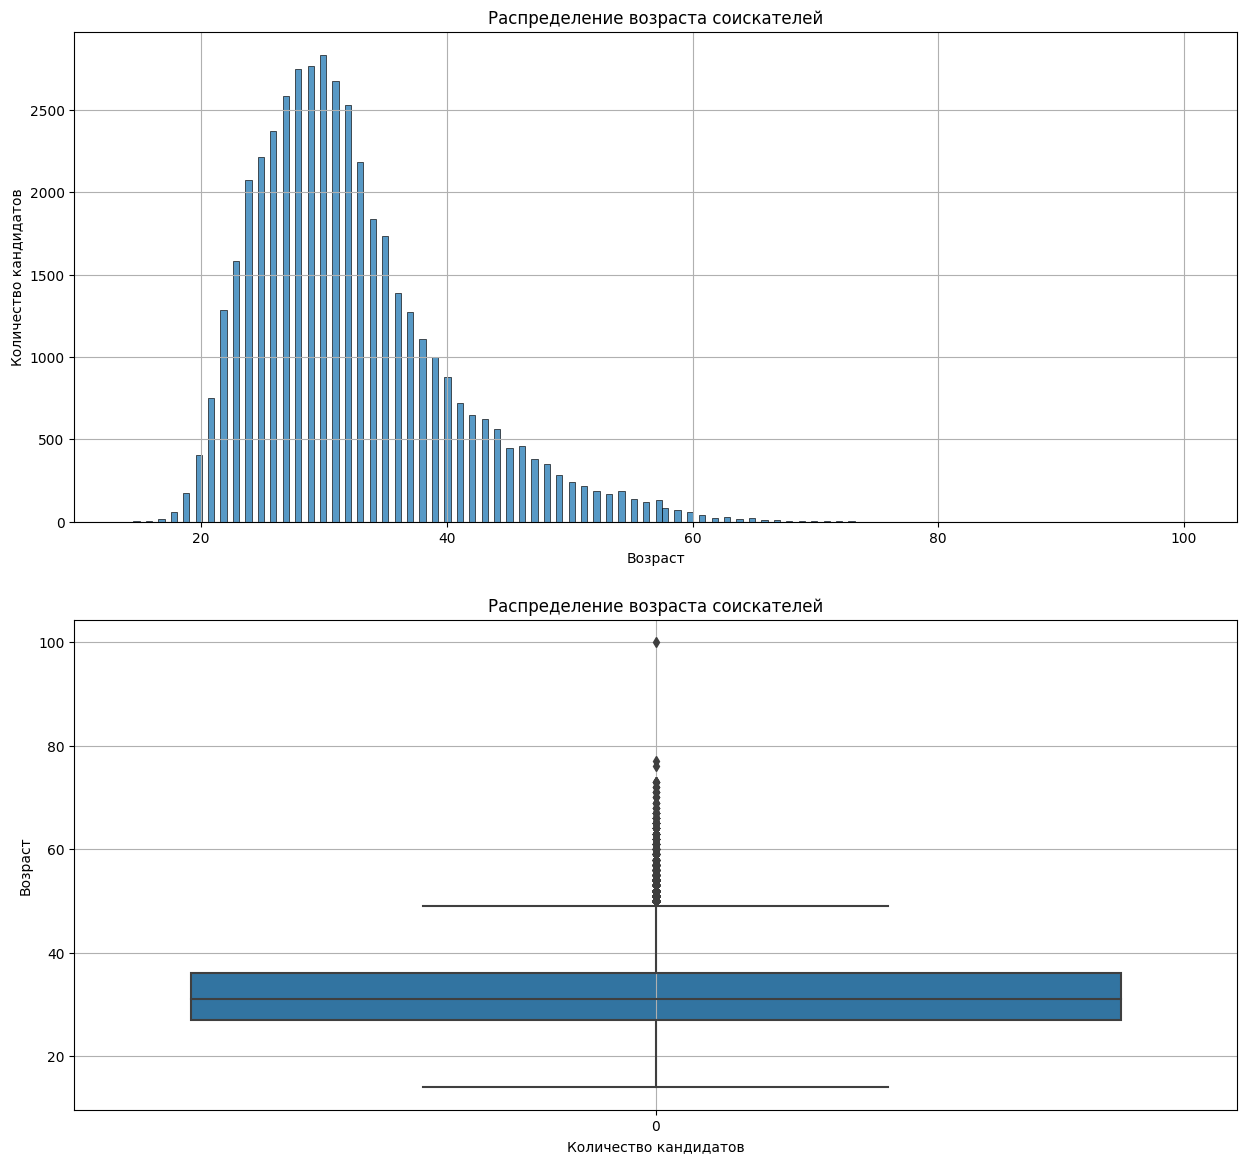

In [28]:
age = data['Возраст']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15,14))

histplot = sns.histplot(
    data = age,
    ax = axes[0],
);
histplot.set_title('Распределение возраста соискателей')
histplot.set_xlabel('Возраст')
histplot.set_ylabel('Количество кандидатов')
histplot.grid()

boxplot = sns.boxplot(
    data = age,
    ax = axes[1],
);
boxplot.set_title('Распределение возраста соискателей')
boxplot.set_xlabel('Количество кандидатов')
boxplot.set_ylabel('Возраст')
boxplot.grid()


Модальное значения распределения возраста соискателей равно 30 годам. Возраст большинства соискателей находится в примерном интервале 27-36 лет. Для признака найдено аномальное значение - кандидат возрастом 100 лет. Также можно было бы отнести к аномальным значениям кандидатов старше пенсиронного возраста, но, как следует из графика "Опыт работы в месяцах" (он располагается ниже), в датасете есть данные о нескольких кандидатах с опытом работы более 504 месяцев (=от 42 лет), из чего могу сделать вывод, что данные о кандидатах возрастом старше 60-ти лет могут быть релевантны.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

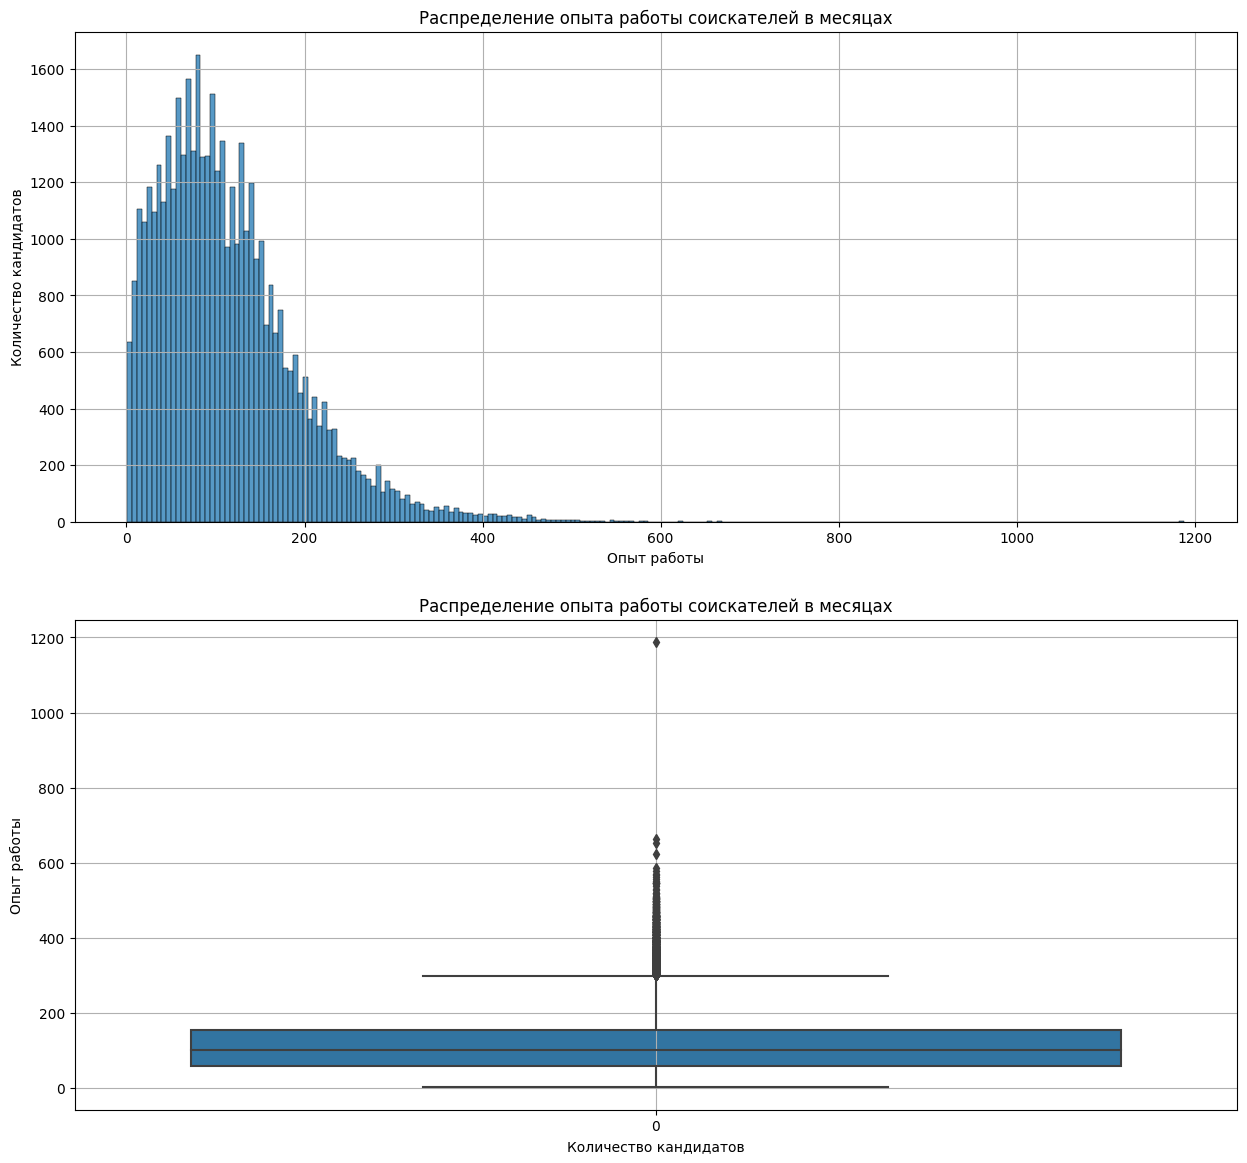

In [27]:
experience = data['Опыт работы (месяц)']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15,14))

histplot = sns.histplot(
    data = experience,
    ax = axes[0],
);
histplot.set_title('Распределение опыта работы соискателей в месяцах')
histplot.set_xlabel('Опыт работы')
histplot.set_ylabel('Количество кандидатов')
histplot.grid()

boxplot = sns.boxplot(
    data = experience,
    ax = axes[1],
);
boxplot.set_title('Распределение опыта работы соискателей в месяцах')
boxplot.set_xlabel('Количество кандидатов')
boxplot.set_ylabel('Опыт работы')
boxplot.grid()

Модальное значение для признака "Опыт работы соискателей в месяцах" равно 84 (=7 лет). Минимальный опыт работы составляет 1 месяц, максимальный - 1188 месяцев (=99 лет), что является аномалией для данного признака. Опыт работы большинства соискателей располагается в диапазоне от 57 до 154 месяцев (=от ~5 до ~13 лет).

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


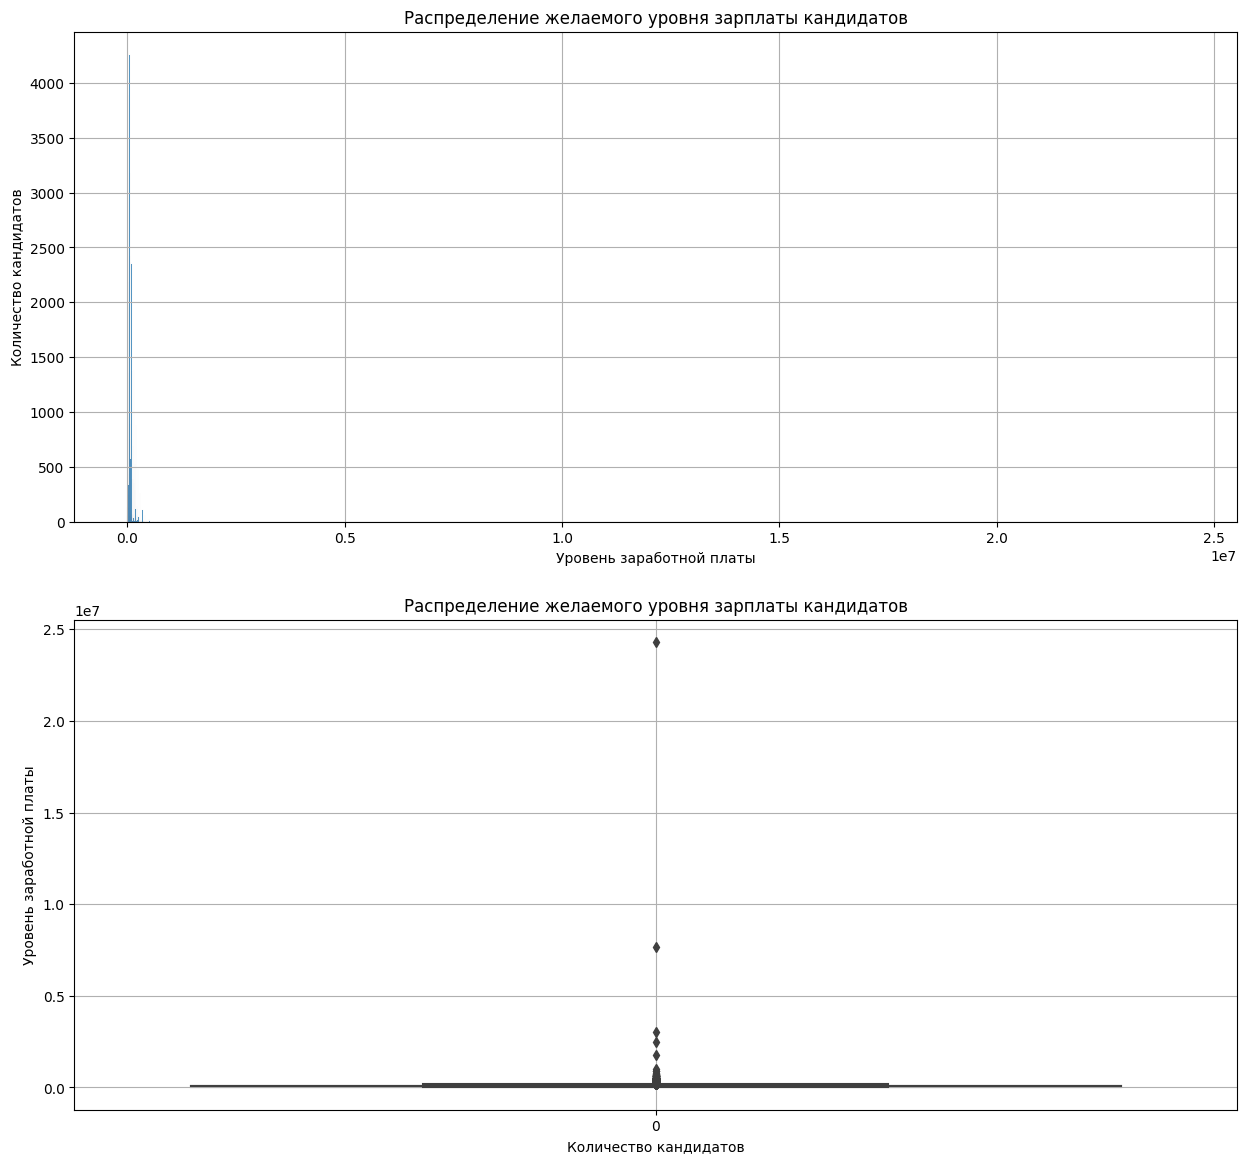

In [16]:
salary = data['ЗП (руб)']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15,14))

histplot = sns.histplot(
    data = salary,
    ax = axes[0],
);
histplot.set_title('Распределение желаемого уровня зарплаты кандидатов')
histplot.set_xlabel('Уровень заработной платы')
histplot.set_ylabel('Количество кандидатов')
histplot.grid()

boxplot = sns.boxplot(
    data = salary,
    ax = axes[1],
);
boxplot.set_title('Распределение желаемого уровня зарплаты кандидатов')
boxplot.set_xlabel('Количество кандидатов')
boxplot.set_ylabel('Уровень заработной платы')
boxplot.grid()

Модальное значение для признака желаемой заработной платы соискателей составляет 50-55 тысяч рублей. Минимальная сумма ожидаемой зарплаты равна 1 рублю, максимальная - 8,5 миллионов рублей. Оба значения являются аномальными, также к выбросам я бы отнесла сумму выше 1 миллиона рублей - такие цифры в данных встречаются гораздо реже. Зарплата большинства кандидатов находится в диапазоне от 36 до 100 тысяч рублей.

Примечание: изначально сделала графики при помощи библиотеки plotly, выводы тоже написала опираясь на диаграмму plotly, но после этого начал очень сильно тормозить и вылетать VSCode, поэтому предоставляю графики, сделанные при помощи seaborn.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

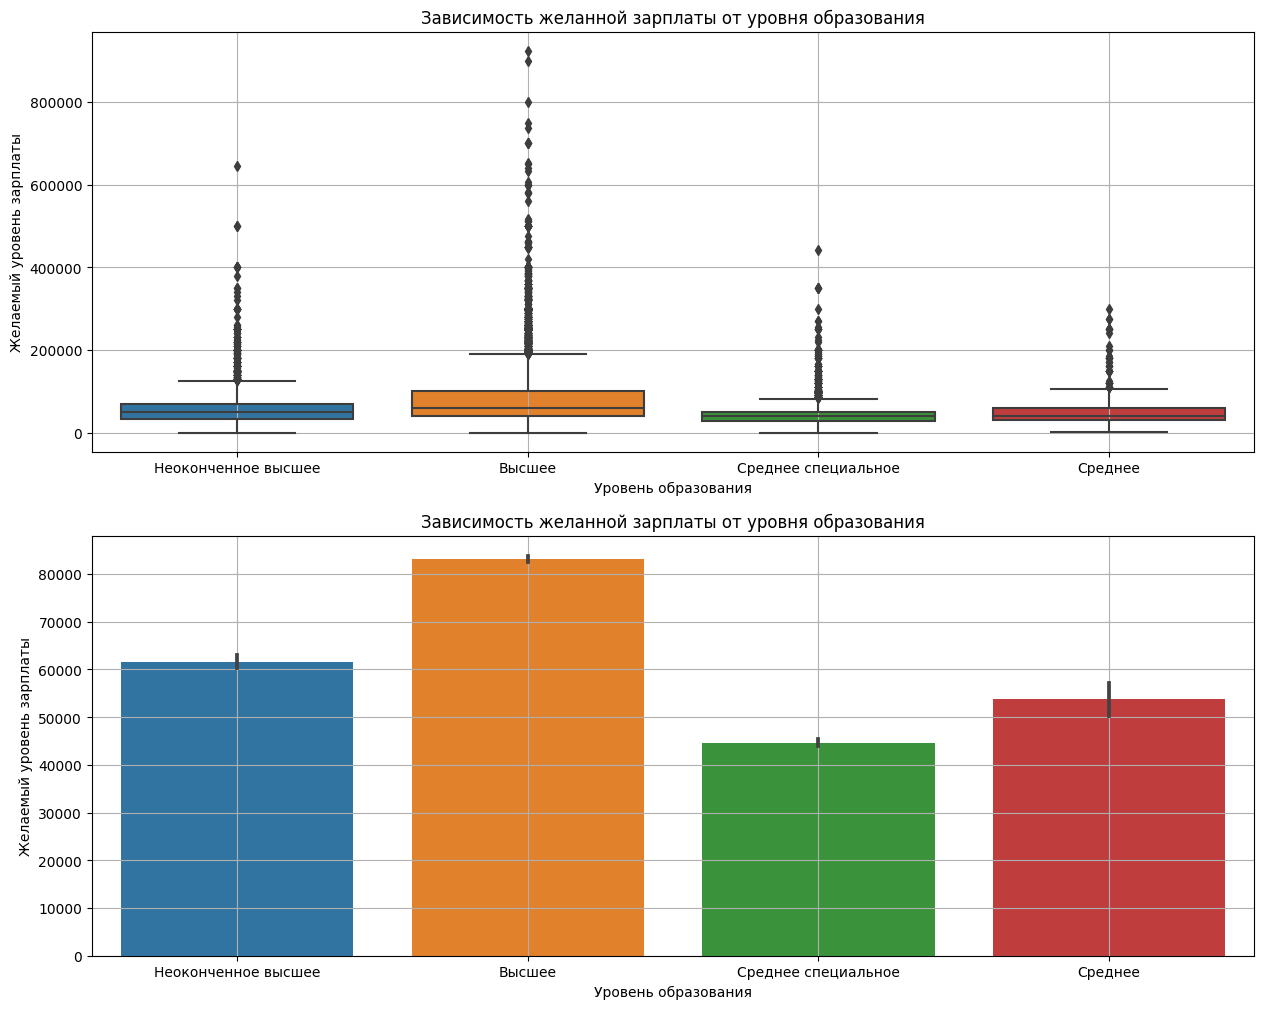

In [14]:
salary_data = data[data['ЗП (руб)']< 1e6]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,12))

salary_box = sns.boxplot(
    data = salary_data,
    x = 'Уровень образования',
    y = 'ЗП (руб)',
    ax = axes[0]
);
salary_box.set_title('Зависимость желанной зарплаты от уровня образования')
salary_box.set_xlabel('Уровень образования')
salary_box.set_ylabel('Желаемый уровень зарплаты')
salary_box.grid()

salary_bar = sns.barplot(
    data = salary_data,
    x = 'Уровень образования',
    y = 'ЗП (руб)',
    ax = axes[1]
);
salary_bar.set_title('Зависимость желанной зарплаты от уровня образования')
salary_bar.set_xlabel('Уровень образования')
salary_bar.set_ylabel('Желаемый уровень зарплаты')
salary_bar.grid()

Наибольший уровень желаемой зарплаты наблюдается для кандидатов с высшим образованием (более 800 тыс. руб./мес.). На самую наименьшую зарплату чаще расчитывают кандидаты со средним специальным образованием (до ~450 тыс. руб./мес.). Можно проследить следующую зависимость уровня образования от желаемой ЗП: самый низкий уровень желанной зарплаты у кандидатов со средним специальным образованием, имеющих профессию. Чуть выше у кандидатов со школьным образованием, далее следуют люди с неоконченным высшим и с высшим образованием.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

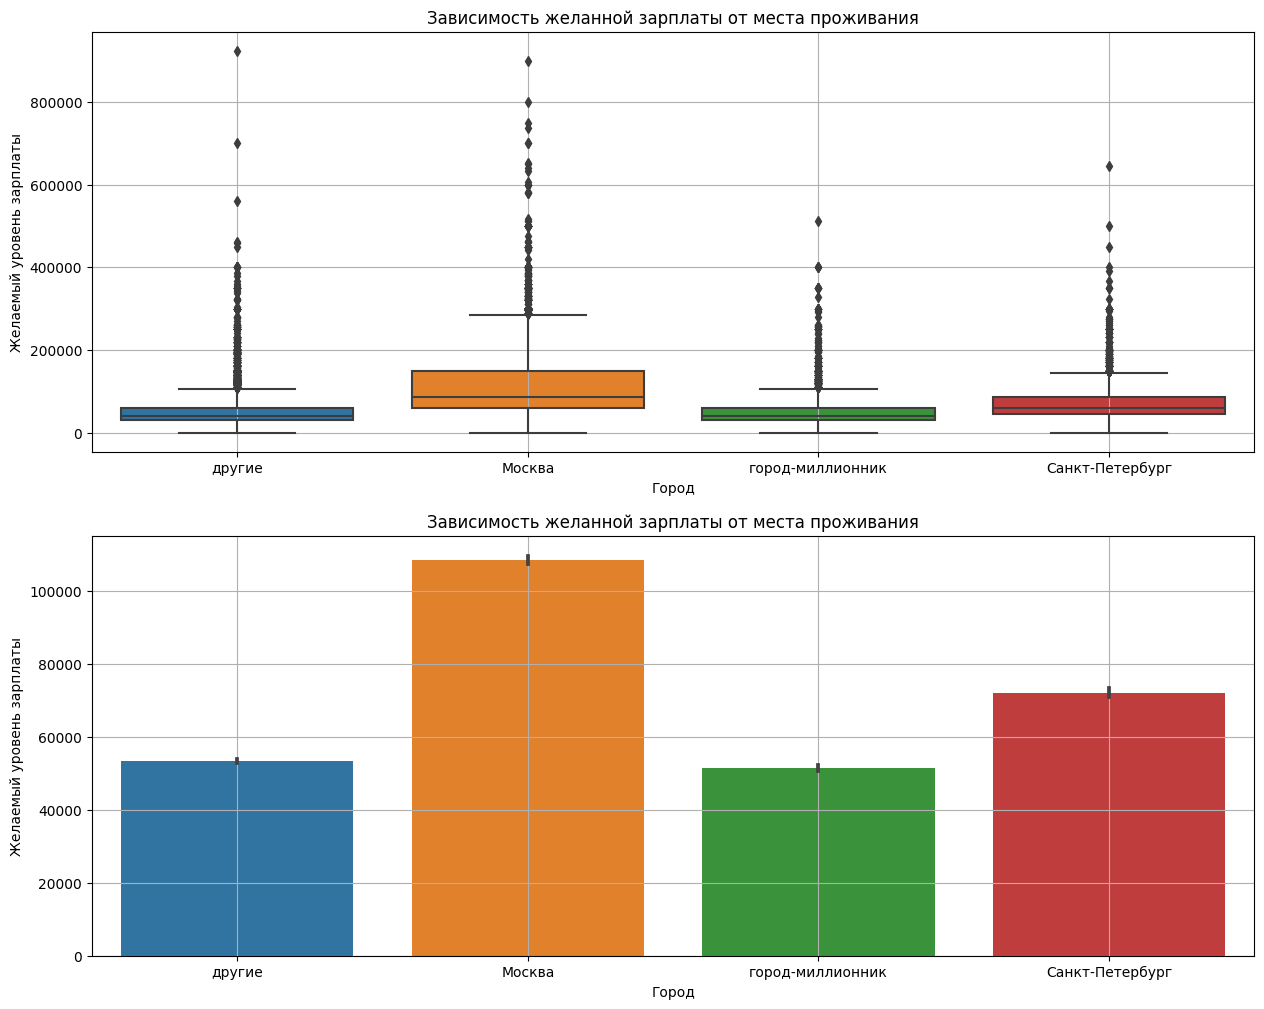

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,12))

city_data = data[data['ЗП (руб)']<1e6]

city_box = sns.boxplot(
    data = city_data,
    x = 'Город',
    y = 'ЗП (руб)',
    ax = axes[0]
);
city_box.set_title('Зависимость желанной зарплаты от места проживания')
city_box.set_xlabel('Город')
city_box.set_ylabel('Желаемый уровень зарплаты')
city_box.grid()

city_bar = sns.barplot(
    data = city_data,
    x = 'Город',
    y = 'ЗП (руб)',
    ax = axes[1]
);
city_bar.set_title('Зависимость желанной зарплаты от места проживания')
city_bar.set_xlabel('Город')
city_bar.set_ylabel('Желаемый уровень зарплаты')
city_bar.grid()

На наибольшую заработную плату (более 800 тыс.руб./мес) чаще расчитывают кандидаты, проживающие в Москве - это логично, т.к. в столице жить стоит дороже, чем в остальных городах России. На втором месте соискатели из Санкт-Петербурга (до ~660 тыс. руб./мес.). Кандидаты из остальных городов рассчитывают на зароботную плату ~ до 520 тыс. руб./мес., независимо оттого в городе-миллионнике они проживают или нет.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

Text(0.5, 0, 'Средний уровень желанной ЗП')

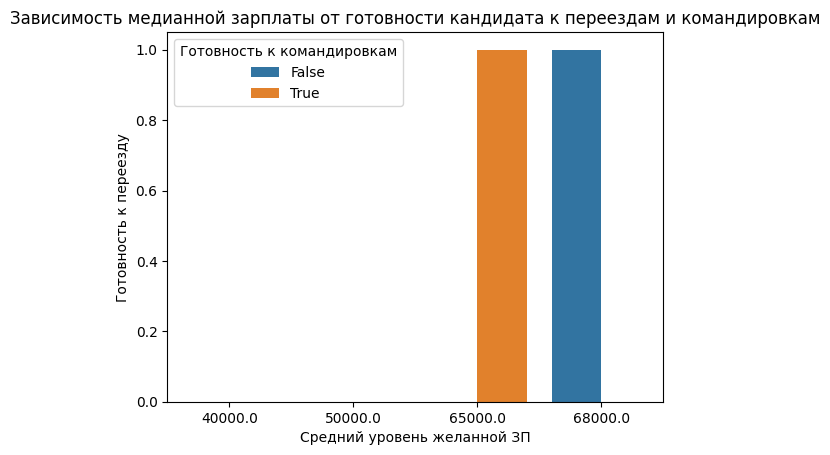

In [20]:
move_data = data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()

move_chart = sns.barplot(
    data = move_data,
    y = 'Готовность к переезду',
    x = 'ЗП (руб)',
    hue = 'Готовность к командировкам'
);
move_chart.set_title('Зависимость медианной зарплаты от готовности кандидата к переездам и командировкам')
move_chart.set_xlabel('Средний уровень желанной ЗП')

Кандидаты, готовые и к переезду и к командировкам в среднем хотят получать зарплату в размере 65 тыс. руб./месяц. Кандидаты, готовые к переезду, но не готовые к комнадировкам, рассчитывают на более высокую зарплату в размере 68 тыс. руб./мес.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

<AxesSubplot: title={'center': 'Распределение уровня желанной з/п в зависимости от возраста и образования кандидата'}, xlabel='Уровень образования', ylabel='Возраст'>

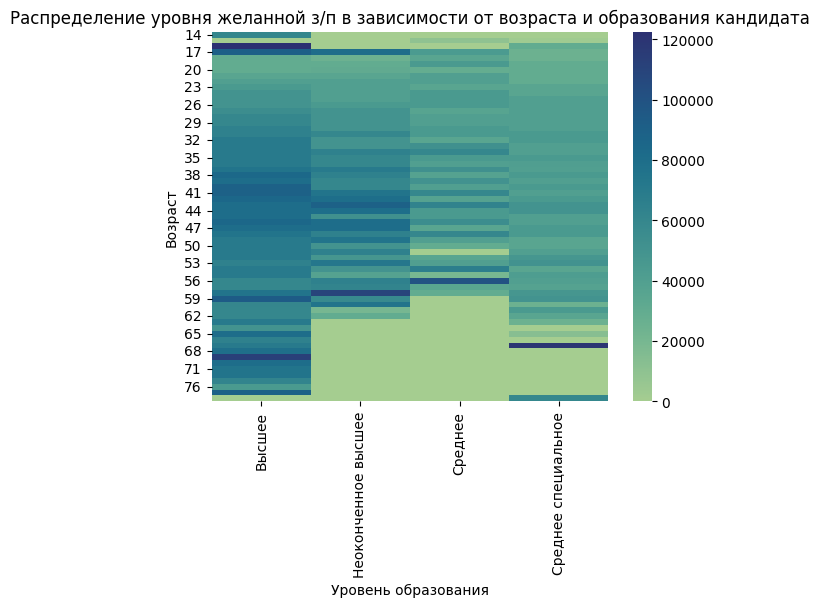

In [38]:
pivot_salary = data.pivot_table(
    values = 'ЗП (руб)',
    index = 'Возраст',
    columns = 'Уровень образования',
    aggfunc = 'median',
    fill_value = 0
);

pivot_chart = sns.heatmap(
    data = pivot_salary,
    cmap = 'crest'
);

pivot_chart.set_title('Распределение уровня желанной з/п в зависимости от возраста и образования кандидата')

pivot_chart

При сравнении тепловой карты необходимо учитывать разное начальное значение возраста для разных категорий образования, т.к. обычно высшее образование получают не раньше 23 лет, среднее специальное в районе 20, а среднее ~ в 17. Также важно заметить, что учебные заведения можно окончить в любом возрасте, но у большинства людей эти сроки приблизительно одинаковы. Таким образом, на самую маленькую зарплату сразу после окончания учебного заведения рассчитывают люди со средним и неоконченным высшим образованием. По окончании колледжей люди рассчитывают приблизительно на такую же заработную плату, что кандидаты с высшим образованием, но увеличение заработной платы происходит быстрее и интенсивнее у соискателей, окончивших ВУЗ. Также достаточно интенсивно по ходу карьеры растёт зарплата у людей с неоконченным высшим образованием. Согласно карте, люди с высшим образованием чаще продолжают работать даже после выхода на пенсию, тогда как анкеты кандидатов старше 59 лет со средним образованием и старше 62 с неоконченным высшим отсутствуют в датасете. Также туда относится большинство соискателей с 65 до 76 со средним специальным образованием.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

<Axes: title={'center': 'Распределение уровня желанной з/п от уровня образования и возраста кандидатов'}, xlabel='Возраст', ylabel='Опыт работы'>

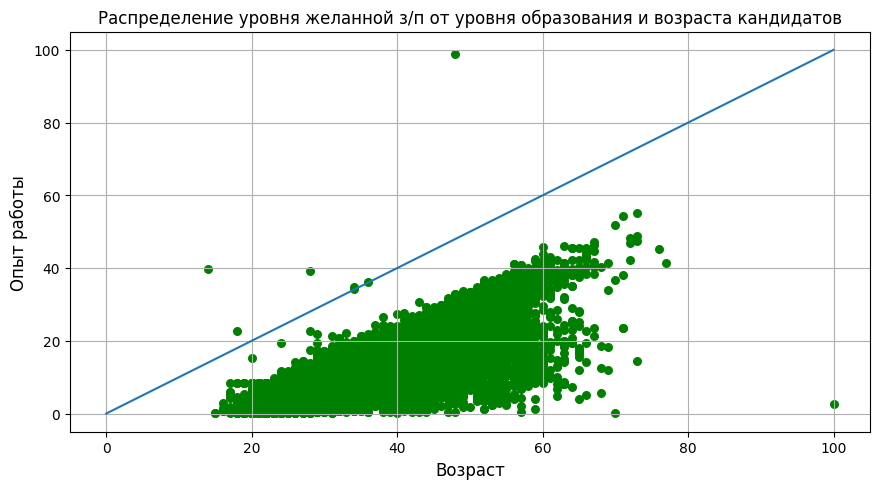

In [32]:
data['Опыт работы (год)'] = data['Опыт работы (месяц)']/12

fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])

experience_scatter = axes.scatter(
    x = data['Возраст'],
    y = data['Опыт работы (год)'],
    s = 30,
    marker = 'o',
    c = 'green'
);

axes.set_title('Распределение уровня желанной з/п от уровня образования и возраста кандидатов', fontsize=12)
axes.set_xlabel('Возраст', fontsize=12)
axes.set_ylabel('Опыт работы', fontsize=12)
axes.grid()
sns.lineplot(x=[0, 100], y=[0, 100])

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [11]:
dupl_columns = list(data.columns)

mask = data.duplicated(subset=dupl_columns)
duplicates = data[mask]
dedupped = data.drop_duplicates(subset=dupl_columns)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [17]:
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)
data.isnull().sum()

currency                           94.919989
date                               94.919989
Опыт работы (месяц)                 0.379939
Последняя/нынешняя должность        0.004470
Последнее/нынешнее место работы     0.002235
dtype: float64

Ищет работу на должность:              0
Последнее/нынешнее место работы        1
Последняя/нынешняя должность           2
Обновление резюме                      0
Авто                                   0
Уровень образования                    0
Пол                                    0
Возраст                                0
Опыт работы (месяц)                  170
Город                                  0
Готовность к переезду                  0
Готовность к командировкам             0
полная занятость                       0
частичная занятость                    0
проектная работа                       0
cтажировка                             0
волонтерство                           0
гибкий график                          0
полный день                            0
сменный график                         0
вахтовый метод                         0
удалённая работа                       0
Валюта                                 0
currency                           42471
date            

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [23]:
data = data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
data['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].fillna(data['Опыт работы (месяц)'].median())

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [29]:
outliers = data[(data['ЗП (руб)'] > 1e6) | (data['ЗП (руб)'] < 1e3)]
data = data.drop(outliers.index)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [34]:
outliers_experience = data[data['Опыт работы (год)'] > data['Возраст']]
data = data.drop(outliers_experience.index)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

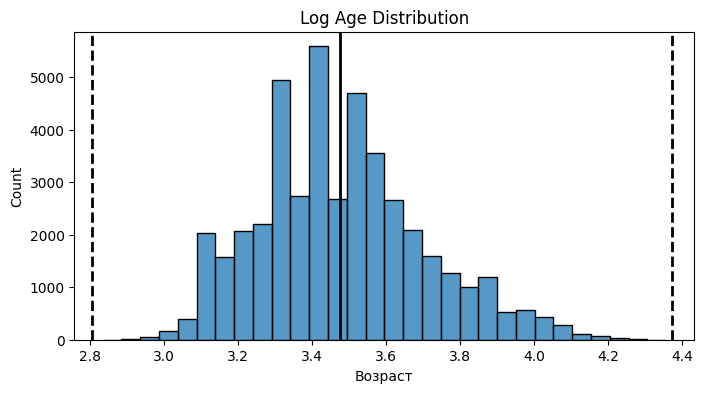

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(data['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 *log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 *log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Age Distribution');

def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, data = outliers_z_score_mod(data, 'Возраст', left=3,  right=4, log_scale=True)

ваш коммментарий здесь